In [1]:
import numpy as np
from scipy.signal import correlate2d
from time import time
import matplotlib.pyplot as plt
from PIL import Image



##Idx is a lit of coordinates where idx[0] is 1st coordinate and idx[0][0] is row (y) and idx[0][1] is col (x)

def match_template_corr( x , template , numPeaks = None, thresh = None):
    start_time = time()
    y = np.empty(x.shape)
    y = correlate2d(x,template,'same')
    end_time = time()
    comp_time_ms = end_time-start_time
    idx = find_peaks(y, template, numPeaks, thresh) #row then column
    plt.imshow(y)
    return y, idx, comp_time_ms

In [3]:
def find_peaks(matches, template, numPeaks, thresh):
    if numPeaks == None:
        numPeaks = 1
    if thresh == None:
        thresh = 0.5 * matches.max()
    nHoodSize = [template.shape[0],template.shape[1]] #height and width of template
    done = False
    row = []
    col = []
    newMatches = matches.copy()
    while not done:
        matches_max = np.amax(newMatches) 
        max_indices = np.where(newMatches == matches_max)
        p = max_indices[0][0]
        q = max_indices[1][0]
        if newMatches[p, q] >= thresh:
            row.append(p)
            col.append(q)
            p1 = int(p - (nHoodSize[0] - 1)/2 )
            p2 = int( p + (nHoodSize[0] - 1)/2)
            q1 = int(q - (nHoodSize[1] - 1)/2)
            q2 = int(q + (nHoodSize[1] - 1)/2)
            pp,qq = np.mgrid[p1:p2, q1:q2]
            pp = np.ravel(pp,'F')
            qq = np.ravel(qq,'F')
            gridCoordinates = list(zip(pp,qq))
            try:
                for i in range(len(gridCoordinates)):
                    newMatches[gridCoordinates[i]] = 0.0
            except IndexError:
                continue
            done = (len(row) == numPeaks)
        else:
            done = True
    return list(zip(row, col))


(array([[     0.      ,      0.      ,      0.      , ...,      0.      ,
              0.      ,      0.      ],
        [     0.      ,      0.      ,      0.      , ...,      0.      ,
              0.      ,      0.      ],
        [     0.      ,      0.      ,      0.      , ...,      0.      ,
              0.      ,      0.      ],
        ...,
        [640811.643718, 687601.811788, 732437.134138, ...,      0.      ,
              0.      ,      0.      ],
        [552525.712389, 594092.761604, 641083.427746, ...,      0.      ,
              0.      ,      0.      ],
        [465160.469714, 502343.997237, 544145.010857, ...,      0.      ,
              0.      ,      0.      ]]),
 [(378, 410)],
 29.7017662525177)

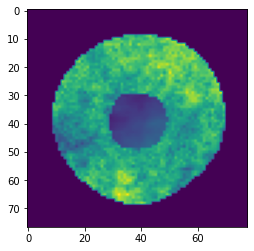

In [4]:
def rgb2gray(rgb_image):
        return np.dot(rgb_image[...,:3], [0.299, 0.587, 0.114])

match_template_corr(rgb2gray(np.array(Image.open("templateImages\cells.png"))), rgb2gray(np.array(Image.open("templateImages\cellsTemplate.png"))))